# Prédiction crise cardiaque

In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
import pandas as pd
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
import pandas as pd
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.pop("time")
data.pop("DEATH_EVENT")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


In [4]:
#quelques bases
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000


In [6]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
dtype: int64

In [8]:
## les gens qui ont le diabete ou pas 
data['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

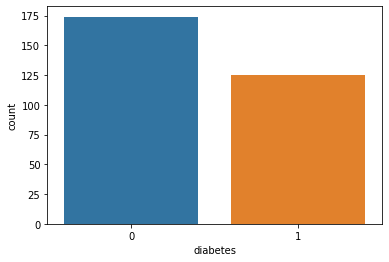

In [9]:
#visualiser 
sns.countplot(data['diabetes'])

<AxesSubplot:xlabel='years', ylabel='count'>

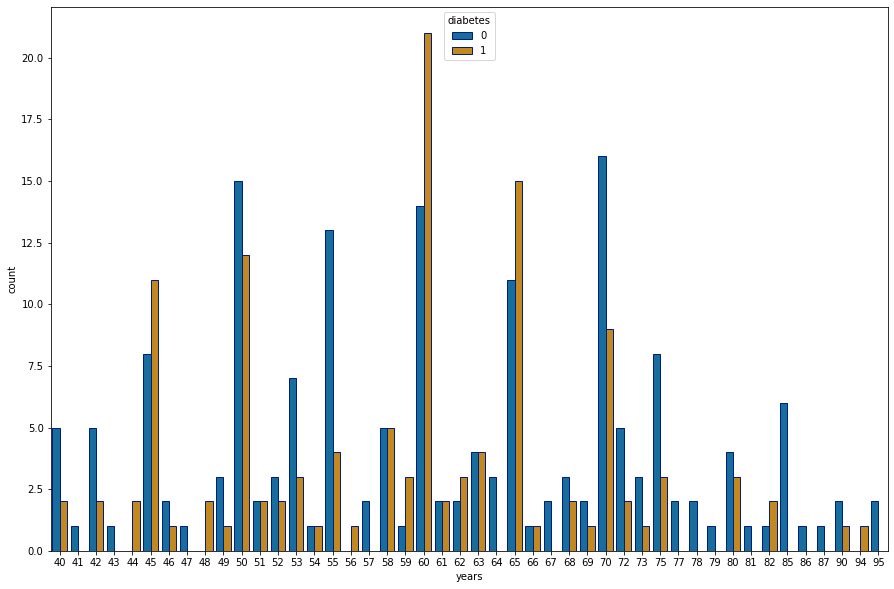

In [10]:
#le nombre des gens qui ont le diabéte 
data['years'] = data['age'].astype(int)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.countplot(x='years', hue='diabetes', data=data, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

In [11]:
##sns.pairplot(data.iloc[:,1:6], hue='diabetes')

In [12]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,years
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.999990
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.087574
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.081406
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.101454
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.060195
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.093170
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.052475
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.159237
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.045912
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,0.065546


<AxesSubplot:>

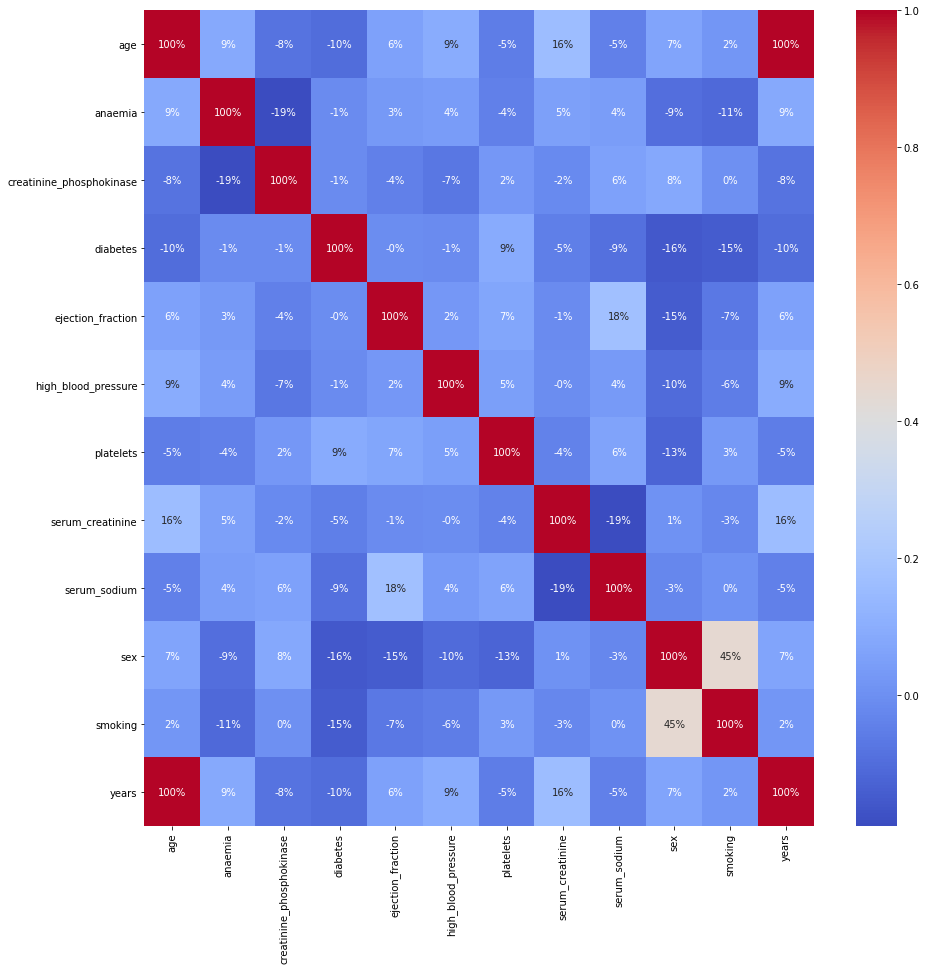

In [13]:
#visualise the data
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True, fmt='.0%', cmap="coolwarm")

In [14]:
#split the data set info independent (X) and dependent (Y) data sets
X = data.iloc[:,[1,2,4,5,6,7,8,9]].values
Y = data.iloc[:,3].values

In [15]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=1)
print('Train set : ', X_train.shape)
print('Test set : ', X_test.shape)

Train set :  (224, 8)
Test set :  (75, 8)


In [16]:
#Scale the data 
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
##Create a function for the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
def models(X_train, Y_train):
    
    #Logistic Regression
    log= LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #Decision Tree
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #########Random Forest Classifier
    forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state= 0)
    forest.fit(X_train, Y_train)
    
    #print the models accuracy on the training data
    
    print('[0]Logestic Regression training Accuracy :', log.score(X_train, Y_train))
    print('[1]Decision Tree training Accuracy :', tree.score(X_train, Y_train))
    print('[2]R F C training Accuracy :', forest.score(X_train, Y_train))
    
    return log, tree, forest
    



In [18]:
# Getting all of the models
model = models(X_train, Y_train)

[0]Logestic Regression training Accuracy : 0.6383928571428571
[1]Decision Tree training Accuracy : 1.0
[2]R F C training Accuracy : 0.9866071428571429


In [19]:
#Test model accuracy data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range (len(model)):
    print('Model', i)
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TP= cm[0][0]
    TN= cm[1][1]
    FP= cm[1][0]
    FN= cm[0][1]

    print(cm)
    print('model test accuracy  : {}'.format((TP + TN)/(TP + TN + FN + FP)))
    print()

Model 0
[[31 12]
 [21 11]]
model test accuracy  : 0.56

Model 1
[[32 11]
 [19 13]]
model test accuracy  : 0.6

Model 2
[[32 11]
 [19 13]]
model test accuracy  : 0.6



In [20]:
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)


[0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0]

[0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1
 0]


In [21]:
print(np.mean(Y_test != pred))

0.4


In [22]:
np.histogram([pred,Y_test])

(array([94,  0,  0,  0,  0,  0,  0,  0,  0, 56]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [24]:
cross_TREE = cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=4, scoring='accuracy')
cross_TREE

array([0.44642857, 0.60714286, 0.58928571, 0.5       ])

In [25]:
print('La moyenne avec CrossVal de DecisionTreeClassifier est :', cross_TREE.mean())

La moyenne avec CrossVal de DecisionTreeClassifier est : 0.5357142857142857


In [26]:
cross_LOG = cross_val_score(LogisticRegression(), X_train, Y_train, cv=5, scoring='accuracy')
cross_LOG

array([0.55555556, 0.62222222, 0.64444444, 0.6       , 0.45454545])

In [27]:
print('La moyenne avec CrossVal de LogisticRegression est :', cross_LOG.mean())

La moyenne avec CrossVal de LogisticRegression est : 0.5753535353535354


In [28]:
cross_Rand = cross_val_score(RandomForestClassifier(), X_train, Y_train, cv=5, scoring='accuracy')
cross_Rand

array([0.53333333, 0.48888889, 0.62222222, 0.55555556, 0.54545455])

In [29]:
print('La moyenne avec CrossVal de RandomForestClassifier est :', cross_Rand.mean())

La moyenne avec CrossVal de RandomForestClassifier est : 0.5490909090909091


In [30]:
from sklearn.model_selection import validation_curve

In [31]:
model = RandomForestClassifier()
k = np.arange(1,50)
train_score, val_score = validation_curve(model, X_train, Y_train,'n_estimators', k, cv=4 )

val_score.shape

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_estimators, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(49, 4)

In [32]:
val_score.mean(axis=1)

array([0.54464286, 0.56696429, 0.52232143, 0.56696429, 0.52232143,
       0.5625    , 0.53571429, 0.57589286, 0.50892857, 0.54464286,
       0.52678571, 0.50892857, 0.51785714, 0.58482143, 0.53571429,
       0.57589286, 0.51339286, 0.55803571, 0.53125   , 0.53125   ,
       0.48660714, 0.54464286, 0.5625    , 0.49107143, 0.54017857,
       0.55803571, 0.54464286, 0.52232143, 0.54464286, 0.53125   ,
       0.51339286, 0.5625    , 0.55803571, 0.5625    , 0.53571429,
       0.51339286, 0.55357143, 0.55357143, 0.5625    , 0.55357143,
       0.53125   , 0.54910714, 0.51785714, 0.54910714, 0.53571429,
       0.57589286, 0.50892857, 0.56696429, 0.57589286])

In [33]:
val_score.mean(),train_score.mean()

(0.5416362973760932, 0.9822643343051506)

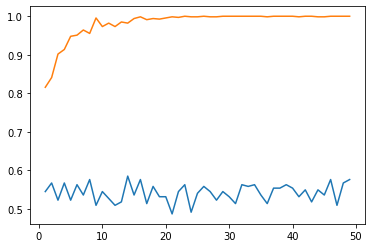

In [34]:
plt.plot(k,val_score.mean(axis=1), label="validation")
plt.plot(k,train_score.mean(axis=1), label="train")

In [35]:
forest2 = RandomForestClassifier(n_estimators = 12, criterion='entropy', random_state= 0)
forest2.fit(X_train, Y_train)
print('R F C training Accuracy :', forest2.score(X_train, Y_train))

R F C training Accuracy : 0.9955357142857143


In [36]:
cm2 = confusion_matrix(Y_test, forest2.predict(X_test))

TP= cm2[0][0]
TN= cm2[1][1]
FP= cm2[1][0]
FN= cm2[0][1]

print(cm2)
print('model test accuracy  : {}'.format((TP + TN)/(TP + TN + FN + FP)))
print()

[[35  8]
 [19 13]]
model test accuracy  : 0.64



In [37]:
pred = forest2.predict(X_test)
print(pred)
print()
print(Y_test)


[0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0]

[0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1
 0]


In [38]:
print(np.mean(Y_test != pred))

0.36
